# Исследование закономерностей, определяющих успешность компьютерных игр.

#### Краткое описание проекта

**Описание проекта:**
Для анализа представлены данные за 2016 год из открытых источников о продажах игр, оценках пользователей и экспертов, жанры и различные игровые платформы.  

**Цель исследования:**
Исследование закономерностей успешности игр позволит для описания потенциально популярного продукта и планирования рекламных кампаний. 

**Ход исследования:**
1. Загрузка данных:
- загрузка датафрейма,
- изучение предоставленных данных на наличие пропусков, дубликатов, соответствие типам данных.
2. Предобработка данных:
- приведение названий столбцов к стилю snake_case,
- поиск явных и неявных дубликатов, очистка массива,
- обработка пропусков,
- корректировка типов данных,
- агрегация данных для дальнейшего анализа (расчет глобальных продаж).
3. Исследовательский анализ данных:
- анализ продаж по годам выпуска игр, по платформам, по жанрам,
- влияние оценок пользователей и критиков на продажи.
4. Описание портрета пользователя:
- предпочитаемые платформы в разных регионах,
- жанровые предпочтения пользователей,
- влияние рейтингов ESRB на предпочтения пользователей в различных регионах.
5. Проверка гипотез:
- Средние рейтинги Xbox One и PC одинаковые.
- Средние рейтинги Action и Sports различаются.

**Общий вывод:**
Данное исследование позволит описать потенциально популярный продукт и спланировать рекламные кампании для  интернет-магазина «Стримчик».

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom

#### Загрузка данных 

##### Загрузка и описание массива данных

In [3]:
# Абсолютный путь
absolute_path = '/datasets/games.csv'

# Преобразуем в относительный путь относительно текущей директории
relative_path = os.path.relpath(absolute_path)

print(f"Относительный путь: {relative_path}")

Относительный путь: ../../../datasets/games.csv


In [4]:
pth1 = 'https://code.s3.yandex.net/datasets/games.csv'
pth2 = '../../../datasets/games.csv'

if os.path.exists(pth1):
    query_1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    query_1 = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
df = query_1
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

##### Вывод по загрузке данных

- массив данных содержит 16715 строк и 11 колонок,
- название столбцов не соответствуют стилю именования snake_case,
- явные дубликаты отсутствуют,
- выявлены пропуски в данных по оценке критиками и пользователями, а также в рейтинге от организации ESRB.

#### Подготовка данных

##### Приведение в соответствие название столбцов стилю snake_case

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Поиск неявных дубликатов

In [10]:
df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])].count()

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

In [11]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release', 'genre'])
df[df.duplicated(['name', 'platform', 'year_of_release', 'genre'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### Обработка пропусков:

- Объяснение причин заполнения пропусков определённым образом.
- Описание причин, которые могли привести к пропускам.

In [12]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

###### название и жанр игры

In [13]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуск данных в имени игры, это одна и та же строка с пропуском жанра, поэтому удаляем ее из массива:

In [14]:
df = df.dropna(subset=['name'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

###### год выпуска (year_of_release)

Год выпуска можно заполнить по имени и платформе

In [15]:
df['year_of_release'].isna().sum()

269

In [16]:
df['year_of_release'].isna().sum()/len(df)

0.016096218286261368

Пропуски составляют 1,6% массива. Год выпуска можно заполнить медианным значением по имени и платформе игр:

In [101]:
df['year_of_release'] = df['year_of_release']\
.fillna(df.groupby(['name', 'platform'])['year_of_release']\
        .transform('median'))
df['year_of_release'].describe()

count    16443.000000
mean      2006.487198
std          5.873158
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [18]:
df['year_of_release'].isna().sum()

268

С сожалению, заменить пропуск года выпуска, основываясь на данных названия и платформы игр, лишь в одной строке. Так как данные по году выпуска важны для дальнейшего анализа остальные строки с пропусками придется удалить:

In [19]:
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

###### оценка критиков (critic_score)

Оценка критиков может быть максимально 100. Пропуски в данных могут быть связаны с отсутствием оценки. Заполним пропуски на 0, чтобы не повлиять на анализ данной характеристики в дальнейшем:

In [20]:
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'].isna().sum()

0

###### оценка пользователей (user_score)

Оценка пользователей может быть максимально 10. Пропуски в данных могут быть связаны с отсутствием оценки. Заполним пропуски на 0, чтобы не повлиять на анализ данной характеристики в дальнейшем:

In [21]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score'].isna().sum()

0

In [22]:
df[df['user_score'] == 'tbd']['user_score'].count()/len(df)

0.14449039163220628

Значение "tbd" составляет 14.5% от массива данных и их нельзя удалить. *Чаще всего аббревиатура "tbd" расшифровывается как "to be determined" и означает "предстоит определить".* Поэтому заменим его на -1, для удобства проведения дальнейшего анализа:

In [23]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -1, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

###### рейтинг от организации ESRB (rating)

Рейтинг для компьютерных игр от ассоциация Entertainment Software Rating Board (ESRB) присваивает им подходящую возрастную категорию. Пропуски могут быть связаны с отсутствием информации о присвоенной категории или отсутствии такого рейтинга. Заменим пропуски на "unknown":

In [24]:
df['rating'] = df['rating'].fillna('unknown')
df['rating'].isna().sum()

0

Категория "RP" («Rating Pending») означает «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. Для анализа данная категория также означает отсутсвие рейтинга, поэтому эти значения заменим "unknown":

In [25]:
df.loc[df['rating'] == 'RP', 'rating'] = 'unknown'

In [26]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### Преобразование данных в подходящие типы

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [28]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unknown


###### изменим на числовой тип данных (int) у года выхода игры, оценки критиков и пользователей

In [29]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [30]:
df['critic_score'] = df['critic_score'].astype('int')

Максимальная оценка игры пользователями составляет 10 и в данных оценка имеет дробную часть, поэтому присвоим этим данным тип 'float':

In [31]:
df['user_score'] = df['user_score'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


###### расчет продаж во всех регионах (миллионы проданных копий)

In [102]:
df['total_sales'] = df.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]\
.sum(axis=1).astype('float')
df['total_sales'].sum().round(2)

8814.82

Общая сумма продаж - 8,815 миллиардов проданных копий за 2016 год.

##### Вывод по подготовке данных

- привели в соответствие название столбцов стилю snake_case;
- выявили неявных дубликатов по основным описательным столбцам ('name', 'platform', 'year_of_release', 'genre') и удалили;
- пропуски в данных по оценкам (критикив, пользователей) и рейтингу игр могут быть связаны с отсутствием оценки. После замены пропусков и удалении строк в массиве 16444 строк. "tbd" ("to be determined") означает "предстоит определить":
    - пропуск данных в имени игры, это одна и та же строка с пропуском жанра, поэтому удалили ее из массива.
    - заменили пропуск года выпуска, основываясь на данных названия и платформы игр, получилось лишь в одной строке. Так как данные по году выпуска важны для дальнейшего анализа остальные строки с пропусками удалили.  
    - в данных по оценке игр критиками и пользователями заменили пропуски на 0;
    - значение "tbd" в данных по оценке игр пользователями заменили его -1.
    - в данных о рейтинг игр (от ESRB) заменили пропуски и категорию "RP" на "unknown". Категория "RP" («Rating Pending») означает «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.  
- изменим на числовой тип данных (int) у года выхода игры и  оценки критиков, а для оценки пользователей ('float');
- рассчитали суммарные продажи во всех регионах и записали их в отдельный столбец, всего продаж - 8,815 млрд. копий; 
- дубликатов и пустых значений в данных не осталось.

#### Исследовательский анализ данных

##### Количество проданных игр в зависимости от года их выпуска

In [34]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.485892
std          5.875369
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

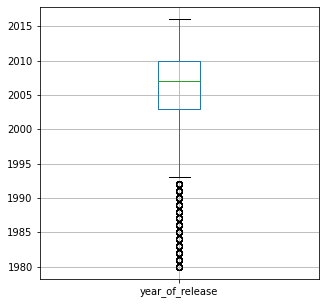

In [35]:
df.boxplot(['year_of_release'], figsize=(5, 5));

В исследуемом массиве игры, выпущенные до 1993 года, можно считать "выбросами".

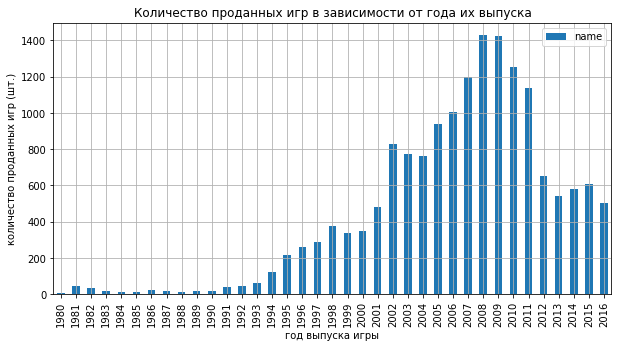

In [115]:
df.pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc='count'
)\
.plot(
    kind='bar', 
    figsize=(10, 5), 
    grid=True
);
plt.title('Количество проданных игр в зависимости от года их выпуска')
plt.ylabel('количество проданных игр (шт.)')
plt.xlabel('год выпуска игры')
plt.show()

In [104]:
df.pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc='count'
)\
.sort_values(by='name', ascending=False).head(10)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1007
2005,939
2002,829
2003,775


**Вывод:**
- В исследуемом массиве присутствуют данные о продаже игр, выпущенные с 1980 по 2016 годы.
- Наибольший интерес у пользователей вызвали игры, выпущенные с 2002 по 2010 годы, а игры 2008 года покупались чаще всего в изучаемый период.
- Игры до 1993 года, согласно диаграмме размаха, можно отнести к "выбросам".
- Игры, выпущенные до 2002 года, имеют очень низкие показатели по продажам.

##### Количество проданных игр в зависимости от платформы

###### изменение уровня продаж по платформам

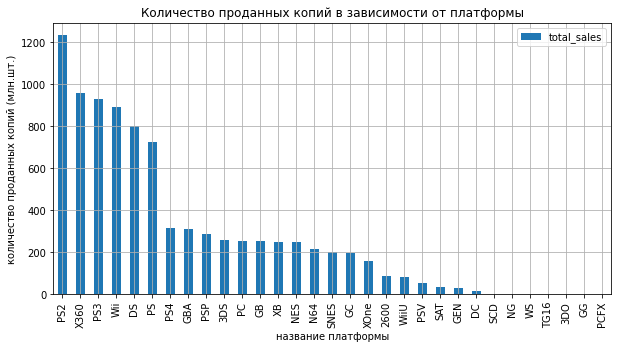

In [118]:
sales_of_platforms = df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum'
)
sales_of_platforms.sort_values(by='total_sales', ascending=False)\
.plot(
    kind='bar', 
    figsize=(10, 5), 
    grid=True);
plt.title('Количество проданных копий в зависимости от платформы')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('название платформы')
plt.show()

In [39]:
sales_of_platforms.sort_values(by='total_sales', ascending=False).head(15)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.81
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


"PS2" (1233,56 млн.копий), "X360" (961,24 млн.копий), "PS3" (931,81 млн.копий), "Wii" (891,18 млн.копий), "DS" (802,78 млн.копий) и "PS" (727,58 млн.копий). При этом, разные модели консоли PS (PS, PS2 и PS3) занимают среди топовых 3 позиции.

###### суммарные продажи топовых платформ в зависимости от года выпуска игр

Построим распределение суммарных продаж игр для топовых платформ по годам:

In [106]:
top_platforms = sales_of_platforms.sort_values(by='total_sales', ascending=False)\
.reset_index().head(6)['platform'].tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

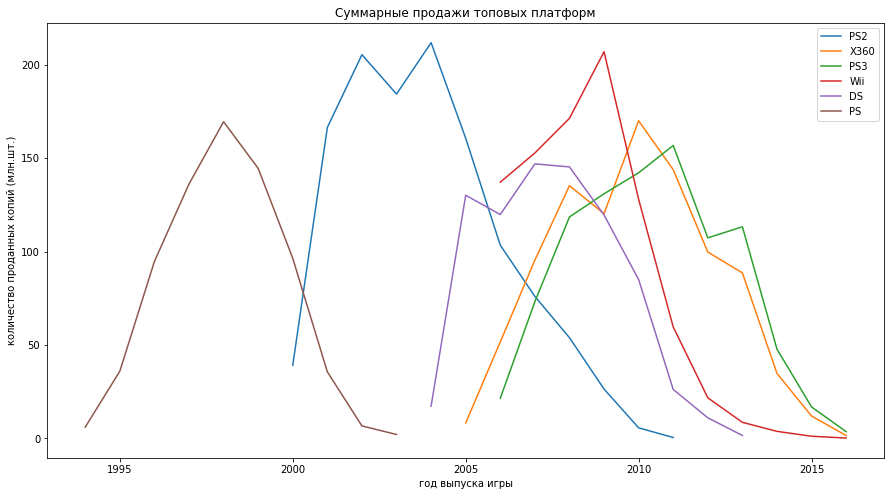

In [117]:
for platform_name in top_platforms:
    (df.query('platform == @platform_name')
    .pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum')
    .sort_values(by='year_of_release', ascending=False)['total_sales']
    .plot(
        label=platform_name, 
        figsize=(15, 8)))
    plt.title('Суммарные продажи топовых платформ')
    plt.ylabel('количество проданных копий (млн.шт.)')
    plt.xlabel('год выпуска игры')
    plt.legend()

На графике виден выбивающийся показатель суммарных продаж для платформы DS. Платформа DS (Nintendo Dual Screen) была выпущена в Японии в декабре 2004 года. 

In [42]:
df.query('platform == "DS" & year_of_release < 2002')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,unknown,0.02


Проверим, есть ли еще данные об этой игре для этой платформы, но возможно с другой датой релиза:

In [43]:
df.query('name == "Strongest Tokyo University Shogi DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,unknown,0.02


Информация по игре "Strongest Tokyo University Shogi" с 1985 годом выпуска не может быть достоверной. Удалим данную аномалию:

In [44]:
df = df.drop(index = 15957)

Продублируем график распределения суммарных продаж топовых платформ по годам:

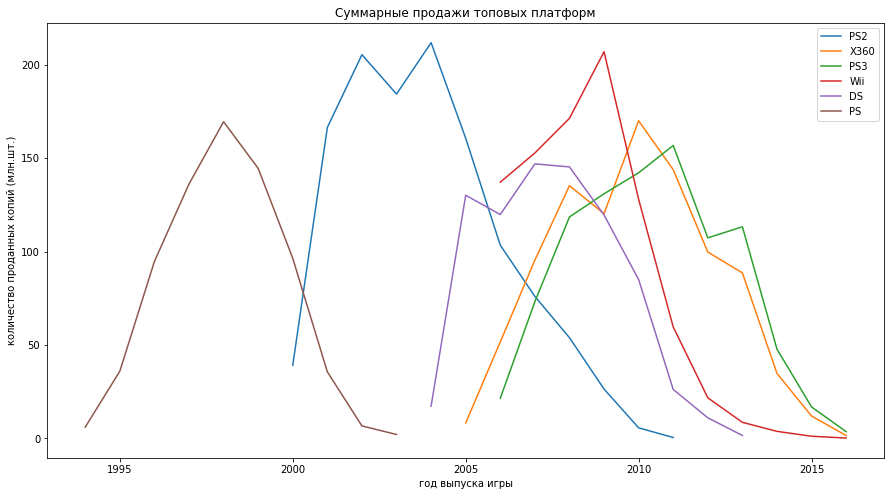

In [45]:
for platform_name in top_platforms:
    (df.query('platform == @platform_name')
    .pivot_table(
        index='year_of_release', 
        values='total_sales', 
        aggfunc='sum')
    .sort_values(by='year_of_release', ascending=False)['total_sales']
    .plot(
        label=platform_name, 
        figsize=(15, 8)))
    plt.title('Суммарные продажи топовых платформ')
    plt.ylabel('количество проданных копий (млн.шт.)')
    plt.xlabel('год выпуска игры')
    plt.legend()

In [113]:
top_platforms_years = df[df['platform'].isin(top_platforms)]\
.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    columns='platform', 
    aggfunc='sum'
)

top_platforms_years.style.background_gradient(sns.light_palette("blue", as_cmap=True))

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,nan,6.030000,nan,nan,nan,nan
1995,nan,35.960000,nan,nan,nan,nan
1996,nan,94.700000,nan,nan,nan,nan
1997,nan,136.170000,nan,nan,nan,nan
1998,nan,169.490000,nan,nan,nan,nan
1999,nan,144.530000,nan,nan,nan,nan
2000,nan,96.370000,39.170000,nan,nan,nan
2001,nan,35.590000,166.430000,nan,nan,nan
2002,nan,6.670000,205.380000,nan,nan,nan


In [114]:
live_top_platform = df[df['platform'].isin(top_platforms)]\
.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc=['min', 'max']
)
live_top_platform['time'] = live_top_platform['max'] - live_top_platform['min']+1
live_top_platform.sort_values(by='time')

,min,max,time
,year_of_release,year_of_release,
platform,,,
DS,2004,2013,10
PS,1994,2003,10
PS3,2006,2016,11
Wii,2006,2016,11
PS2,2000,2011,12
X360,2005,2016,12


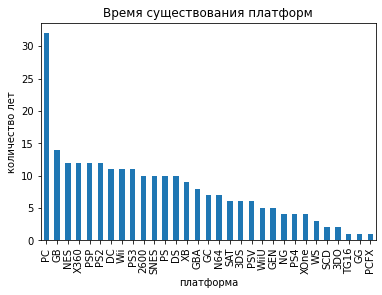

In [48]:
live_platform = df.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc=['min', 'max']
)
live_platform['time'] = live_platform['max'] - live_platform['min']+1
live_platform['time'].sort_values(ascending=False).plot(kind="bar");
plt.title('Время существования платформ')
plt.ylabel('количество лет')
plt.xlabel('платформа')
plt.show()

In [49]:
live_platform = df.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc=['min', 'max']
)
live_platform['time'] = live_platform['max'] - live_platform['min']+1
live_platform.sort_values(by='time', ascending=False).head(10)

,min,max,time
,year_of_release,year_of_release,
platform,,,
PC,1985,2016,32
GB,1988,2001,14
NES,1983,1994,12
X360,2005,2016,12
PSP,2004,2015,12
PS2,2000,2011,12
DC,1998,2008,11
Wii,2006,2016,11


In [50]:
time_live = np.ceil(live_platform['time'].median())
time_live

7.0

**Вывод**
- Исследование данных по суммарным продажам игр выявило 6 лидеров рейтинга:
    - Платформа "PS2" является лидером по количеству проданных копий 1,23 млрд копий. Максимальные продажи зафиксированы в 2004 году (211.81 млн. копий) 
    - Платформа "X360" занимает второе место в рейтинге и к 2016 году продала 961,24 млн.копий. В 2010 году реализовав максимальное для своей платформы количество игр - 170.03 млн. копий. 
    - Третье место по суммарным продажам занимает платформа "PS3", реализовавшая 931,81 млн.копий игр. В 2011 году достигла своего пика в 156.78 млн. копий.
    - Следующие в рейтинге - платформы от Nintendo: "Wii" (891,18 мнл. копий) и "DS" (802,78 млн. копий)
    - Последнее место в топовом рейтинге занимает платформа "PS" (727,58 млн.копий).
    - Остальные платформы реализовали меньше 315 млн.копий за изучаемый период.
- График распределения суммарных продаж топовых платформ по годам показывает, что у каждой из них есть период с пиковыми продажами в середине "жизненного цикла".
- Жизненный цикл успешных платформ 10-12 лет, при этом, для всех изучаемых платформ в среднем жизненный цикл составляет 7 лет.
- Максимальное значение по жизненному циклу у платформы PC - 32 года. Также GB (Nintendo Game Boy) просуществовал 14 лет.

##### Cуммарные продажи платформ в зависимости от года выпуска игр за актуальный период

Актуальный период для  быстро развивающейся индустрии компьютерных игр можно считать половину от среднего жизненного цикл платформ:

In [51]:
actual_prev_year = 2016 - np.ceil(time_live/2)
actual_prev_year

2012.0

Актуальный период: с 2012 года.

In [52]:
actual_df = df[df['year_of_release'] >= actual_prev_year]
actual_df['year_of_release'].count()/len(df)

0.17545460074195707

Актуальные данные с 2012 года составляют 17,5% всего массива.

In [53]:
actual_platforms = actual_df.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'
)
actual_platforms.style.background_gradient(sns.light_palette("blue", as_cmap=True))

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.360000,56.570000,43.760000,27.780000,15.140000
DS,11.010000,1.540000,nan,nan,nan
PC,23.220000,12.380000,13.280000,8.520000,5.250000
PS3,107.350000,113.250000,47.760000,16.820000,3.600000
PS4,nan,25.990000,100.000000,118.900000,69.250000
PSP,7.690000,3.140000,0.240000,0.120000,nan
PSV,16.190000,10.590000,11.900000,6.250000,4.250000
Wii,21.710000,8.590000,3.750000,1.140000,0.180000
WiiU,17.560000,21.650000,22.030000,16.350000,4.600000


In [54]:
actual_df.pivot_table(
    index='platform',
    values='total_sales', 
    aggfunc='sum'
)\
.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


**Вывод:**
- Лидерами продаж в актуальный период являются "PS4" (314.14 млн. копий), "PS3" (288.78 млн. копий) и  "X360" (236.54 млн. копий).
- На момент исследования некоторые платформы уже не имеют продаж в актуальном периоде. К таким платформам относятся - "DS" (нет продаж с 2014 года) и "PSP" (нет продаж с 2016 года).
- Наиболее потенциальными на ближайший год можно считать "PS4" и "XOne" (159.32 млн. копий), поскольку находятся на пике своего жизненного цикла, хотя уже проявляется тенденция к снижению продаж. Также стоит отметить, что пиковые продажи у этих платформ пришелся на 3-ий год жизненного цикла (2015 год): "PS4" - 118.90 млн. копий, а "XOne" - 60.14 млн. копий. 

##### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [55]:
actual_df['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

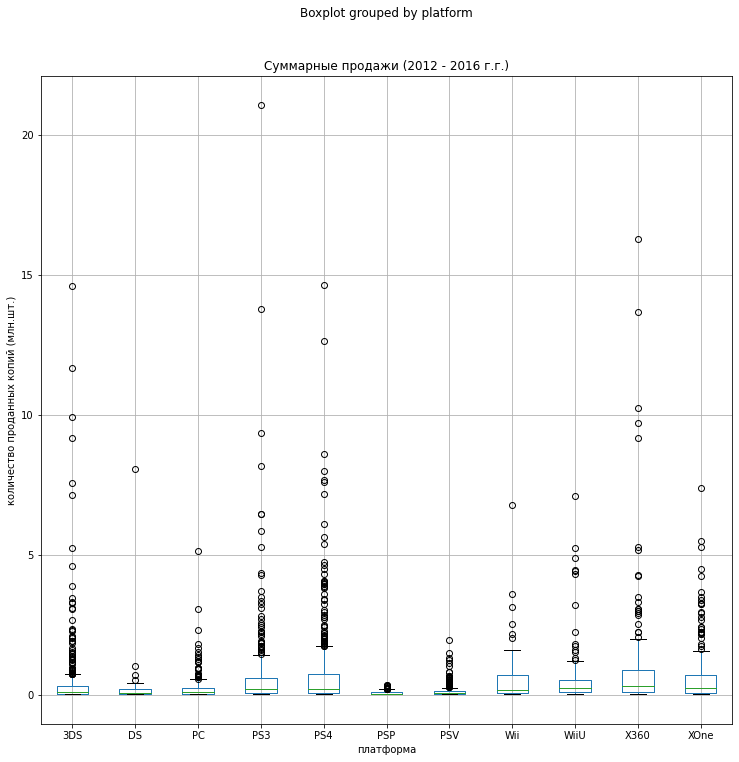

In [56]:
actual_df.boxplot(
    by='platform', 
    column=['total_sales'], 
    figsize=(12, 12)
);
#plt.ylim(0, 2)
plt.title('Суммарные продажи (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('платформа')
plt.show();

Боксплоты для всех платформ с учетом всех выбросов не позволяют визуально сравнить средние значения и квартили, изучаемых платформ. 
Скорректируем диаграмму, уменьшив лимит значений по оси суммарных продаж: 

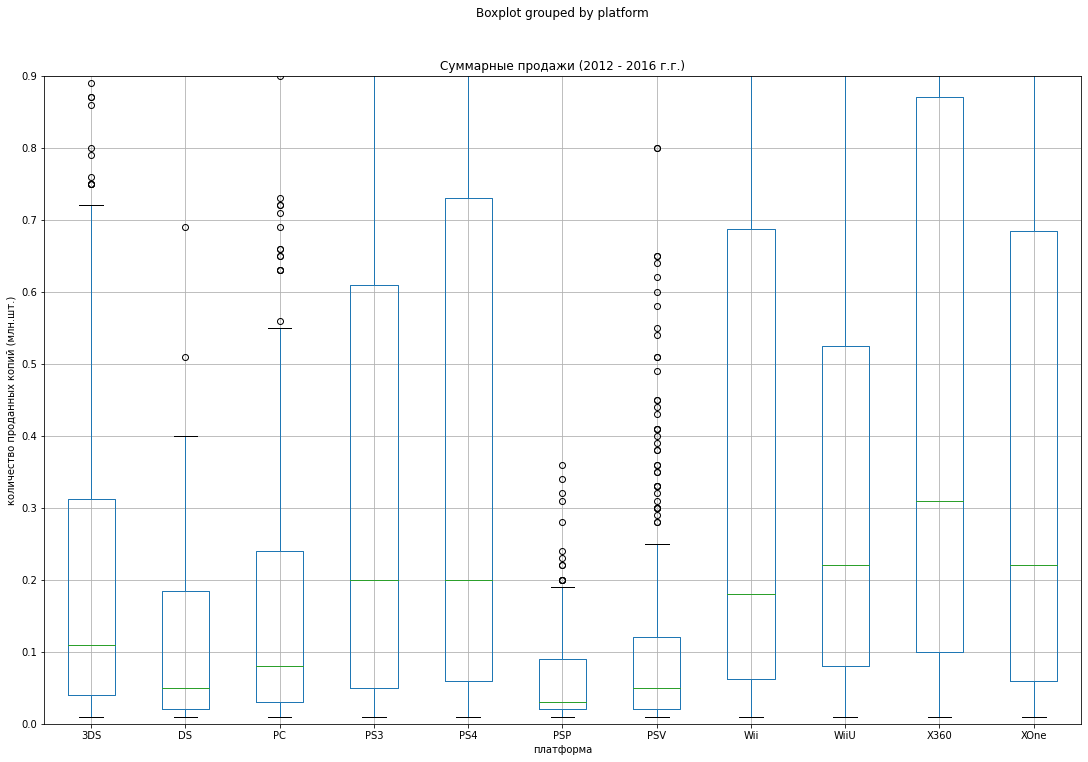

In [57]:
actual_df.boxplot(
    by='platform', 
    column=['total_sales'], 
    figsize=(18, 12)
);
plt.ylim(0, 0.9)
plt.title('Суммарные продажи (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('платформа')
plt.show();

Для более точного определения медианных значений выведем таблицу с данными показателями по платформам:

In [58]:
actual_df.pivot_table(
    index='platform',
    values='total_sales', 
    aggfunc='median'
)\
.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
X360,0.31
WiiU,0.22
XOne,0.22
PS4,0.20
PS3,0.20
Wii,0.18
3DS,0.11
PC,0.08
DS,0.05


**Вывод:**
Описательная статистика продаж по различным платформам в актуальный период (2009-2016 г.г.) позволяет сделать следующие выводы:
- медианное значение по общему количеству проданных копий составляет 0,12 млн.копий, при этом интерквартильный размах включает в себя значения от 0,04 млн.копий до 0,43 млн.копий;
- диаграмма размаха показывает большое количество "выбросов" по каждой платформе, а также сильные различия в медианных значений продаж среди платформ - от 0,03 млн.копий до 0,31 млн.копий;
- максимальное медианное значение у платформы "X360" (0,31 млн.копий), при этом значительная часть данных находится в диапазоне от 0,1 млн.копий до примерно 860 млн.копий, что составляет самый большой интерквартильный размах в сравнении с другими платформами; 
- платформы "XOne" и "WiiU" имеют одинаковые медианные значения (0.22 млн.копий), однако размеры их интерквартильных размахов различны - "XOne" имеет более широкий диапазон (примерно от 0,05 до 0,69 млн. копий),  чем "WiiU" (примерно от 0,09 до 0,52 млн. копий);  
- платформы "PS3" и "PS4" имеют одинаковые медианные значения (0.2 млн.копий), при этом у "PS4" верхняя граница интерквартильного размаха выше, чем у "PS3" (примерно на 0,21 млн.копий);
- медианное значения платформа "Wii" равно 0,18 млн. копий, при этом размах чуть меньше, чем у лидера продаж "PS4" и находится в диапазоне примерно от 0,06 до 0,069 млн.копий.  
- также для консолей "PS3", "PS4", "X360" и "XOne" характерно смещение в сторону максимальных значений.

##### Влияние отзывов пользователей и критиков на продажи 

###### Влияние оценок пользователей и критиков на продажи внутри одной популярной платформы

В актуальный период лидером продаж является "PS4" (314.14 мил. копий), поэтому для анализа возьмем данные по этой платформе. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В анализе исключим данные без оценки ("-1" и "0"). Рассмотрим данные по отзывам пользователей и продажам по платформе "PS4":

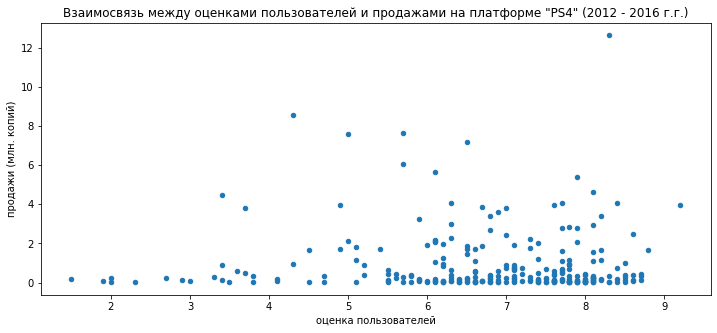

In [59]:
actual_df.query('platform == "PS4" & user_score > 0')\
.plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками пользователей и продажами на платформе "PS4" (2012 - 2016 г.г.)')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show();

Посчитаем корреляцию между отзывами пользователей и продажами игр на платформе "PS4":

In [60]:
actual_df.query('platform == "PS4" & user_score > 0')['user_score']\
.corr(actual_df.query('platform == "PS4" & user_score > 0')['total_sales'])

-0.031957110204556376

На диаграмме рассеивания визуально показано, что значительная часть оценок пользователей находится в диапазоне примерно от 6,5 до 8.
Показатель корреляции (-0,031) показывает очень слабую отрицательную взаимосвязь между оценками пользователей и уровнем продаж игр на платформе "PS4". 

Рассмотрим данные по оценкам критиков и продажам по платформе "PS4". 

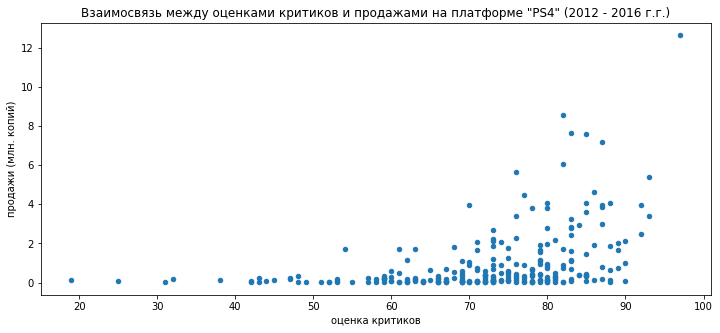

In [61]:
actual_df.query('platform == "PS4" & critic_score > 0')\
.plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками критиков и продажами на платформе "PS4" (2012 - 2016 г.г.)')
plt.xlabel('оценка критиков')
plt.ylabel('продажи (млн. копий)')
plt.show();

Посчитаем корреляцию между оценками критиков и продажами игр на платформе "PS4":

In [62]:
actual_df.query('platform == "PS4" & critic_score > 0')['critic_score']\
.corr(actual_df.query('platform == "PS4" & critic_score > 0')['total_sales'])

0.40656790206178095

На диаграмме рассеивания визуально показано, что значительная часть оценок критиков сосредоточена около 80 баллов.
Показатель корреляции (0.40657) показывает слабую положительную взаимосвязь между оценками критиков и уровнем продаж игр на платформе "PS4", однако эта взаимосвязь сильнее, чем у оценок пользователей.

**Вывод:**
- В целом, взаимосвязь оценок и уровня продаж платформе "PS4" слабая. При этом, можно сказать, что оценка критиков не только находится в более сильной взаимосвязи с уровнем продаж, чем оценка пользователей (корреляция с оценками пользователей - "-0,031", с оценками критиков - "0.40657"), но и имеет прямую взаимосвязь (т.е положительный показатель корреляции), в отличии от оценок пользователей (с отрицательным показателем).
- Так же можно отметить, что оценки в большей степени фиксируются в "положительной" зоне, т.е. большинство оценок приближаются к высшим баллам (к 8 - у пользователей и к 80 - у критиков). Возможно, "плохие" (низкие) оценки пользователями не проставлялись, поэтому в данных такое большое количество пропущенных значений.

###### Влияние оценок пользователей и критиков на продажи других платформ в актуальный период

Проведем аналогичный анализ для платформ "PS3" и "X360" в актуальный период, поскольку эти платформы также являются лидерами по продажам в актуальный период ("PS3" - 288,78 млн.копий и "X360" - 236,54 млн. копий).

Оценим взаимосвязь оценок пользователей и продажи платформы "PS3": 

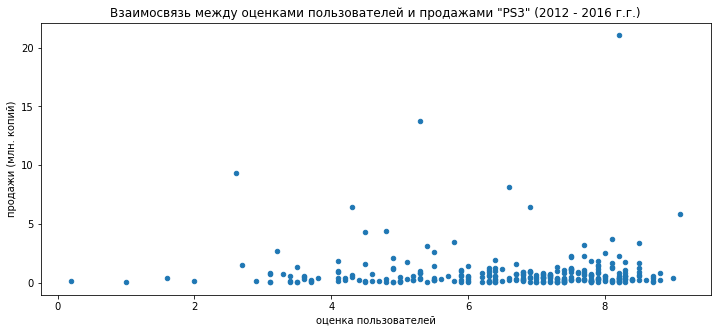

In [63]:
actual_df.query('platform == "PS3" & user_score > 0')\
.plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками пользователей и продажами "PS3" (2012 - 2016 г.г.)')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show();

In [64]:
actual_df.query('platform == "PS3" & user_score > 0')['user_score']\
.corr(actual_df.query('platform == "PS3" & user_score > 0')['total_sales'])

-0.006205767686051523

Взаимосвязь оценок пользователей и уровня продаж платформе "PS3" очень слабая и отрицательная (-0,0062).

Оценим взаимосвязь оценок пользователей и продажи платформы "X360":

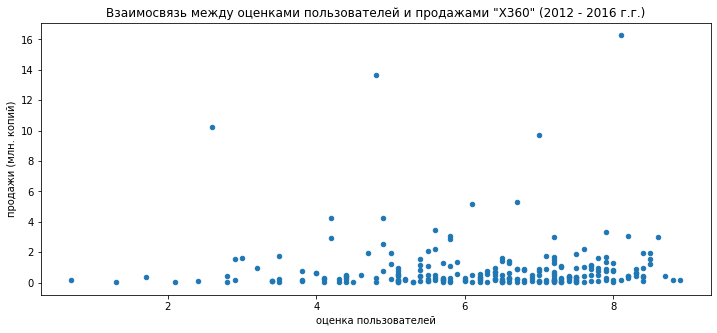

In [65]:
actual_df.query('platform == "X360" & user_score > 0')\
.plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками пользователей и продажами "X360" (2012 - 2016 г.г.)')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show();

In [66]:
actual_df.query('platform == "X360" & user_score > 0')['user_score']\
.corr(actual_df.query('platform == "X360" & user_score > 0')['total_sales'])

0.006163978646213326

Взаимосвязь оценок пользователей и уровня продаж платформе "X360" очень слабая положительная (0.006).

На диаграмме рассеивания для платформ "PS3" и "X360" визуально показано, что значительная часть оценок пользователей стремится к 8 баллам.

Рассмотрим взаимосвязь оценкок критиков и продаж по платформам "PS3" и "X360". Сначала проанализируем данные о платформе "PS3" и ее взаимосвязи с оценками пользователей:

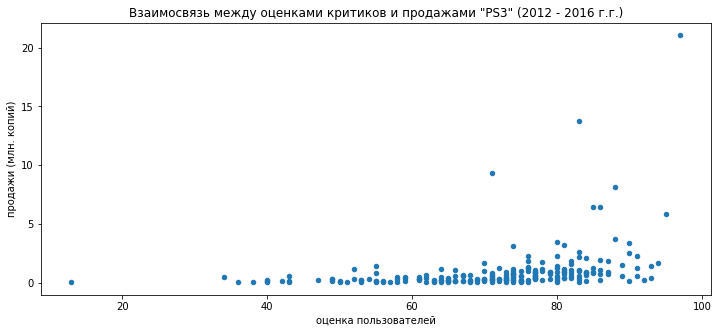

In [67]:
actual_df.query('platform == "PS3" & critic_score > 0')\
.plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками критиков и продажами "PS3" (2012 - 2016 г.г.)')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show();

In [68]:
actual_df.query('platform == "PS3" & critic_score > 0')['critic_score']\
.corr(actual_df.query('platform == "PS3" & critic_score > 0')['total_sales'])

0.3341517575509856

На диаграмме рассеивания визуально показано, что значительная часть оценок критиков сосредоточена около 80 баллов.
Показатель корреляции (0.33415) показывает слабую положительную взаимосвязь между оценками критиков и уровнем продаж игр на платформе "PS3", однако эта взаимосвязь сильнее, чем у оценок пользователей.

Оценим взаимосвязь оценок критиков и продажи платформы "X360":

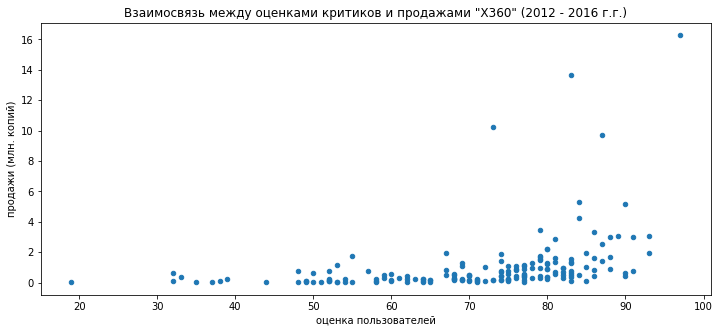

In [69]:
actual_df.query('platform == "X360" & critic_score > 0')\
.plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    figsize=(12, 5));
plt.title('Взаимосвязь между оценками критиков и продажами "X360" (2012 - 2016 г.г.)')
plt.xlabel('оценка пользователей')
plt.ylabel('продажи (млн. копий)')
plt.show();

In [70]:
actual_df.query('platform == "X360" & critic_score > 0')['critic_score']\
.corr(actual_df.query('platform == "X360" & critic_score > 0')['total_sales'])

0.3605734888507336

На диаграмме рассеивания визуально показано, что значительная часть оценок критиков свыше 75 баллов.
Показатель корреляции (0.36057) показывает слабую положительную взаимосвязь между оценками критиков и уровнем продаж игр на платформе "X360", однако эта взаимосвязь несколько сильнее, чем у оценок пользователей.

**Вывод:**
- В целом, взаимосвязь оценок и уровня продаж "PS3" и "X360" слабая, при этом оценка критиков находится в более сильной взаимосвязи с уровнем продаж, чем оценка пользователей.
- Так же можно отметить, что оценки в большей степени фиксируются в "положительной" зоне, т.е. большинство оценок находятся во второй половине шкалы.

##### Исследование игр по жанрам

###### Общее распределение игр по жанрам

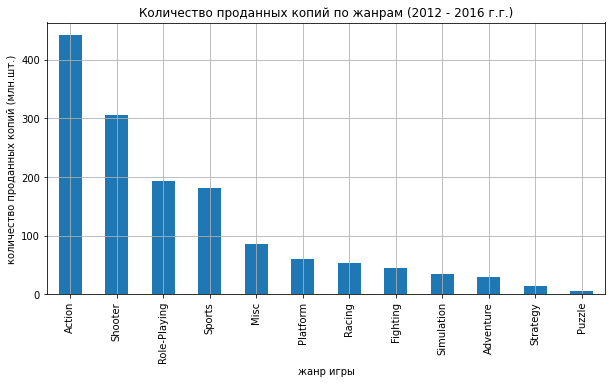

In [119]:
actual_genre = actual_df.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum')
actual_genre.sort_values(by='total_sales', ascending=False)\
.plot(
    kind='bar', 
    figsize=(10, 5), 
    legend=False, 
    grid=True);
plt.title('Количество проданных копий по жанрам (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('жанр игры')
plt.show()

Для более точного определения суммарных продаж по жанрам (в млн.копий), выведем таблицу:

In [72]:
actual_df.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


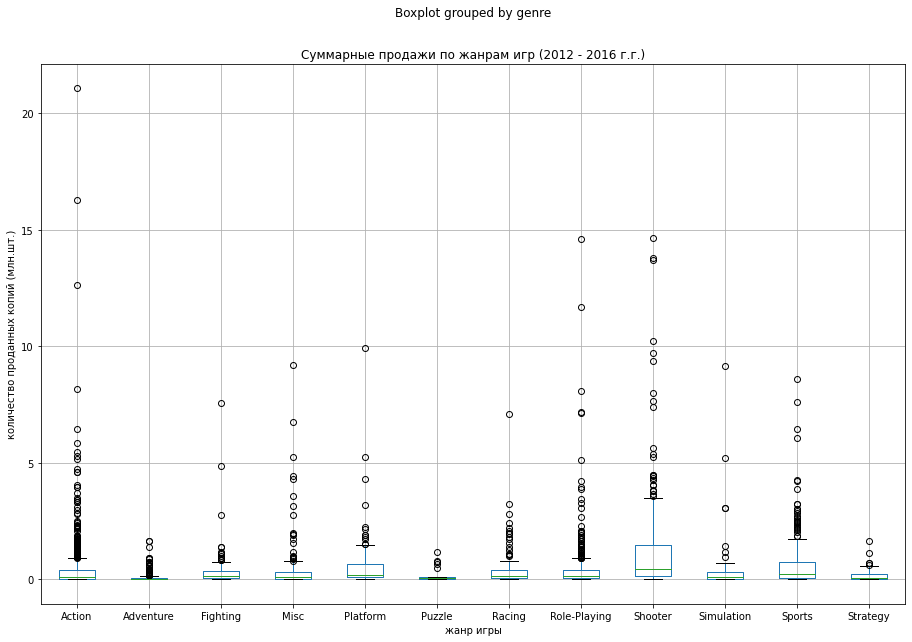

In [73]:
actual_df.boxplot(
    by='genre', 
    column=['total_sales'], 
    figsize=(15, 10))
#plt.ylim(0,3)
plt.title('Суммарные продажи по жанрам игр (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('жанр игры')
plt.show();

Боксплоты для игр всех жанров имеют очень много выбросов, что не позволяют визуально сравнить средние значения и квартили, изучаемых жанров. Скорректируем диаграмму, уменьшив лимит значений по оси суммарных продаж:

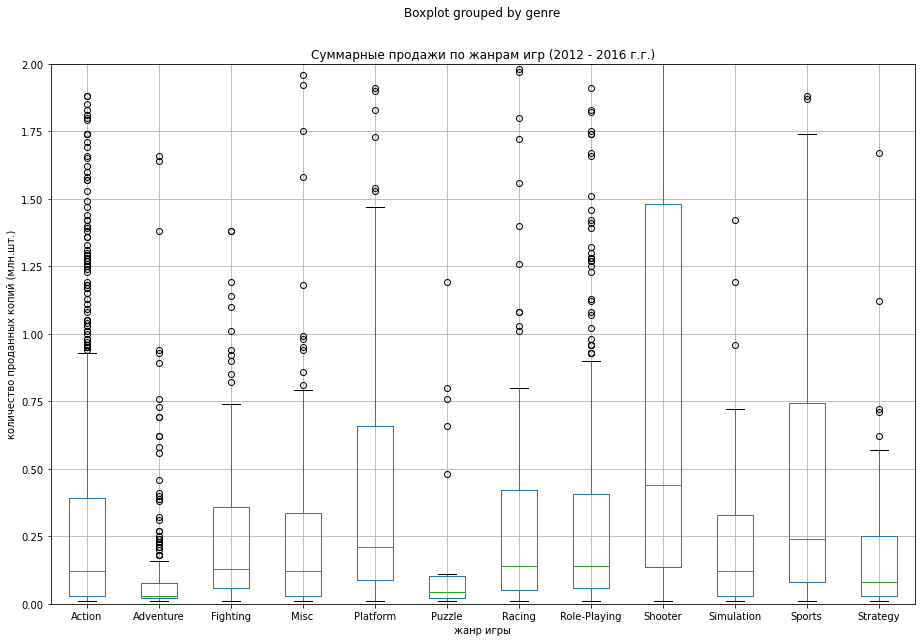

In [74]:
actual_df.boxplot(
    by='genre', 
    column=['total_sales'], 
    figsize=(15, 10))
plt.ylim(0, 2)
plt.title('Суммарные продажи по жанрам игр (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('жанр игры')
plt.show();

In [75]:
actual_df.groupby('genre')['total_sales'].describe()\
.style.background_gradient(sns.light_palette("blue", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.000000,0.427856,1.166504,0.010000,0.030000,0.120000,0.390000,21.050000
Adventure,302.000000,0.097450,0.208237,0.010000,0.020000,0.030000,0.077500,1.660000
Fighting,109.000000,0.408165,0.910385,0.010000,0.060000,0.130000,0.360000,7.550000
Misc,192.000000,0.442917,1.081047,0.010000,0.030000,0.120000,0.337500,9.180000
Platform,85.000000,0.717647,1.364413,0.010000,0.090000,0.210000,0.660000,9.900000
Puzzle,28.000000,0.174643,0.305438,0.010000,0.020000,0.045000,0.102500,1.190000
Racing,115.000000,0.465217,0.888664,0.010000,0.050000,0.140000,0.420000,7.090000
Role-Playing,370.000000,0.521081,1.315937,0.010000,0.060000,0.140000,0.407500,14.600000
Shooter,235.000000,1.296723,2.251662,0.010000,0.135000,0.440000,1.480000,14.630000


**Вывод:**
- наиболее популярными можно назвать следующие жанры игр - "Action" (441,12 млн.копий), "Shooter" (304,73 млн.копий), "Role-Playing" (192,8 млн.копий), "Sports" (181,06 млн.копий).
- игры жанра "Shooter" занимают вторую позицию по количеству проданных копий, но при этом медианное значение у этих игр самое большое - 0,44 млн.копий и самым большой размах - от 0,135 до 1,48 млн. копий.   
- на диаграмме размаха можно увидеть, что во всех жанрах присутствует большое количество выбросов и смещение в сторону максимальных значений.

##### **Выводы по исследовательскому анализу**
1. Больше всего продано игр, выпущенных с 2002 по 2010 годы, а игры 2008-09 годов покупались чаще всего. 
2. Суммарные продажи позволяют выделить лидеров среди платформ - "PS2", "X360", "PS3", "Wii", "DS" и "PS".
3. Средний жизненный цикл платформ составляет 7 лет. Успешные платформы сохраняют жизненный цикл 10-12 лет. Пик продаж приходится примерно на середину жизненного цикла. Платформа-"долгожитель": PC - 32 года.
- Интересно, что для игр на PS жизненные циклы предыдущих платформ пересекаются с новыми платформами, в то время как для Nintendo можно заметить параллельное существование платформ. 
- Актуальным периодом для дальнейшего анализа возьмем период с 2012 до 2016 годы.
4. Исследование взаимосвязи объема продаж по годам для различных платформ в актуальный период позволило сделать несколько выводов:
- Лидерами продаж в актуальный период являются "PS4", "PS3" и "X360". Однако, согласно показателю жизненного цикла, платформы "PS3" и "X360" движутся к своему "закату". Это подтверждается также и значительным снижением уровня продаж в 2016 году. 
- При этом, платформа "X360" имеет максимальное медианное значение (0,31 млн. копий), а значительная часть данных находится в диапазоне от 0,1 млн.копий до примерно 860 млн.копий, что составляет самый большой интерквартильный размах в сравнении с другими платформами.
- Стоит отметить, что у некоторых консолей равные медианные значения: "PS3" и "PS4" (0,20 млн. копий), "XOne" и "WiiU" (0,22 млн. копий).
- Таким образом, наиболее потенциальными на ближайший год можно считать "PS4" и "XOne".
- Описательная статистика показывает, что медианное значение по общему количеству проданных копий составляет 0,12 млн.копий, а интерквартильный размах - от 0,04 млн.копий до 0,43 млн.копий;.
5. Взаимосвязь оценок пользователей и критиков и объема продаж незначительная, однако стоит отметить, что взаимосвязь оценок критиков несколько больше, чем оценок пользователей. Также выявлено, что оценки в большей степени представлены во второй половине шкалы и стремятся к максимальной оценке. 
6. Наиболее популярные жанры игр - "Action", "Shooter", "Role-Playing", "Sports".

#### Портрет пользователя каждого региона

##### Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP).

In [76]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [120]:
platform_regions = actual_df.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum')
platform_regions.sort_values(by='total_sales', ascending=False)\
.style.background_gradient(sns.light_palette("blue", as_cmap=True))

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,141.090000,15.960000,108.740000,314.140000
PS3,106.850000,35.290000,103.380000,288.780000
X360,74.520000,1.570000,140.050000,236.540000
3DS,42.640000,87.790000,55.310000,194.610000
XOne,51.590000,0.340000,93.120000,159.320000
WiiU,25.130000,13.010000,38.100000,82.190000
PC,37.760000,0.000000,19.120000,62.650000
PSV,11.360000,21.040000,10.980000,49.180000
Wii,11.920000,3.390000,17.450000,35.370000


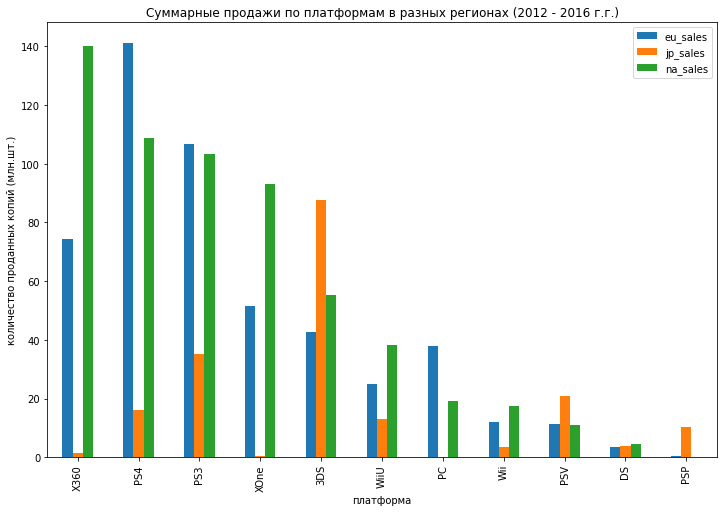

In [78]:
actual_df.pivot_table(
    index='platform', 
    values=regions, 
    aggfunc='sum')\
.sort_values(by=regions, ascending=False)\
.plot(
    kind='bar', 
    figsize=(12, 8));
plt.title('Суммарные продажи по платформам в разных регионах (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('платформа')
plt.show();

In [79]:
na_platform = actual_df.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)

In [80]:
eu_platform = actual_df.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)

In [81]:
jp_platform = actual_df.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)

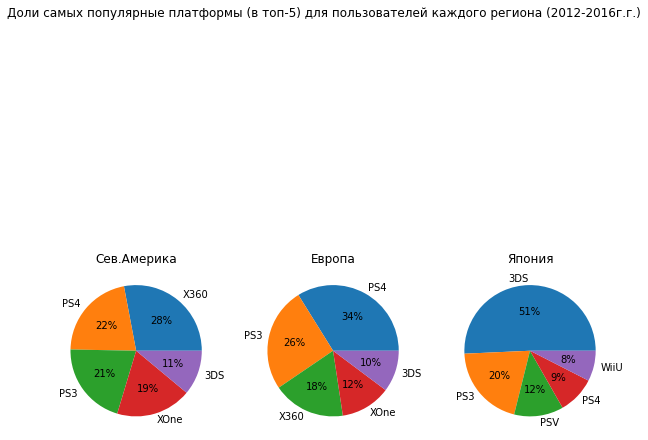

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
fig.suptitle('Доли самых популярные платформы (в топ-5) для пользователей каждого региона (2012-2016г.г.)')

na_platform.head(5).plot(
    kind='pie', 
    y='na_sales', 
    ax=ax[0], 
    autopct = '%.0f%%').set(ylabel='');
ax[0].set_title('Сев.Америка')

eu_platform.head(5).plot(
    kind='pie', 
    y='eu_sales', 
    ax=ax[1], 
    autopct = '%.0f%%').set(ylabel='');
ax[1].set_title('Европа')

jp_platform.head(5).plot(
    kind='pie', 
    y='jp_sales', 
    ax=ax[2], 
    autopct = '%.0f%%').set(ylabel='');
ax[2].set_title('Япония')

plt.show()

**Вывод:**
1. Лидеры среди платформ различается в изучаемых регионах: 
- в Сев.Америке наиболее популярна платформа "X360" (140,05 млн. копий) и занимает 28% среди топ-5 платформ, к которым также относятся "PS4" (108,74 млн. копий), "PS3" (103,38  млн. копий), "XOne" (93,12 млн. копий), "3DS" (55,31 млн. копий), ;
- в Европе лидером является "PS4" (141.09 млн. копий) и занимает 34% среди топ-5 платформ, к которым также относятся "PS3" (106,85 млн. копий), "X360" (74,52  млн. копий), "XOne" (51,59 млн. копий) и "3DS" (124.22  млн. копий); 
- в Японии самой популярной является платформа "3DS" (87,79 млн. копий)  и занимает 51% от платформ топ-5, в который также входят "PS3" (35,29 млн. копий), "PSV" (21,04 млн. копий), "PS4" (15,96 млн. копий) и "WiiU" (13,01 млн. копий);
- платформы "PS3", "PS4" и "3DS" представлены в топ-5 во всех трех регионах, при этом в рейтинге платформ в Японии лидер выражен наиболее ярко, заняв половину в топ-5;
- платформы "X360"и "XOne" отсутствует в топ-5 в Японии, также в рейтинг вошли платформы "PSV" и "WiiU", которые не встречаются в топ-5 Сев.Америки и Европы.
2. В Сев. Америке и Европе основное соперничество наблюдается между "XBox" (с платформами "X360" и "XOne") и "PlayStation" (с платформами "PS3" и "PS4").

##### Самые популярные жанры (топ-5)

In [83]:
genres_regions = actual_df.pivot_table(
    index='genre', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
)
genres_regions.sort_values(by='total_sales', ascending=False)\
.style.background_gradient(sns.light_palette("blue", as_cmap=True))

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,159.340000,52.800000,177.840000,441.120000
Shooter,113.470000,9.230000,144.770000,304.730000
Role-Playing,48.530000,65.440000,64.000000,192.800000
Sports,69.080000,8.010000,81.530000,181.060000
Misc,26.320000,12.860000,38.190000,85.040000
Platform,21.410000,8.630000,25.380000,61.000000
Racing,27.290000,2.500000,17.220000,53.500000
Fighting,10.790000,9.440000,19.790000,44.490000
Simulation,14.550000,10.410000,7.970000,35.120000


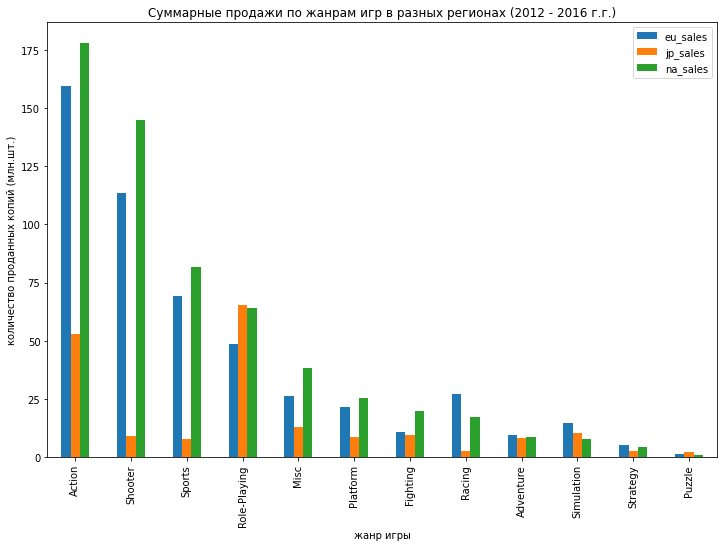

In [123]:
actual_df.pivot_table(
    index='genre', 
    values=regions, 
    aggfunc='sum')\
.sort_values(by=regions, ascending=False)\
.plot(
    kind='bar', 
    figsize=(12, 8));
plt.title('Суммарные продажи по жанрам игр в разных регионах (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('жанр игры')
plt.show();

In [85]:
na_genre = actual_df.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)

In [86]:
eu_genre = actual_df.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)

In [87]:
jp_genre = actual_df.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)

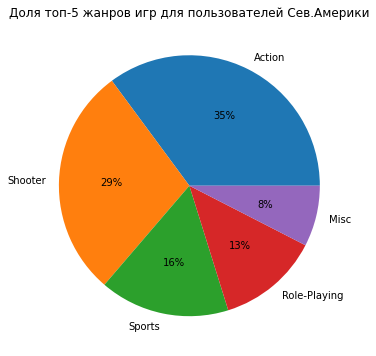

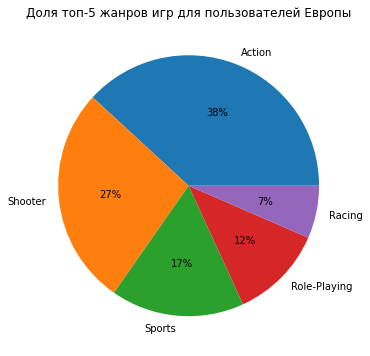

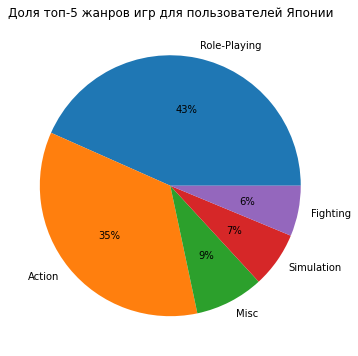

In [88]:
na_genre.head(5).plot(
    kind='pie', 
    y='na_sales', 
    autopct = '%.0f%%', 
    figsize=(6, 6)).set(ylabel='');
plt.title('Доля топ-5 жанров игр для пользователей Сев.Америки')
plt.show()

eu_genre.head(5).plot(
    kind='pie', 
    y='eu_sales', 
    autopct = '%.0f%%', 
    figsize=(6, 6)).set(ylabel='');
plt.title('Доля топ-5 жанров игр для пользователей Европы')
plt.show()

jp_genre.head(5).plot(
    kind='pie', 
    y='jp_sales', 
    autopct = '%.0f%%', 
    figsize=(6, 6)).set(ylabel='');
plt.title('Доля топ-5 жанров игр для пользователей Японии')

plt.show()

**Вывод:**
1. Лидеры среди жанров различается в изучаемых регионах: 
- в топ-5 игр по жанрам в Сев.Америке "Action", "Shooter", "Sports", "Role-Playing" и "Misc".
- в топ-5 игр по жанрам в Европе входят "Action", "Shooter", "Sports", "Role-Playing" и "Racing".
- топ-5 жанров в Японии также включает "Role-Playing", "Action", "Misc", "Simulation" и "Fighting". 
- в Сев.Америке и Европе наиболее популярна платформа "Action" (в Америке - 177,84 млн. копий, в Европе - 159,34 млн. копий), при этом данный жанр занимает в топ-5 в Америке 35%, а в Европе 38%. 
- в Японии лидером среди жанров является "Role-Playing" (65,44 млн. копий), что составляет 43% в топ-5. 

2. Несмотря на различие рейтингов, есть некоторые сходства:
- Структура топ-5 жанров в Сев.Америке и Европе совпадают, доли жанров в своих регионах различаются незначительно - чуть больше трети занимает "Action", около трети - "Shooter", шестую часть - "Sports";
- Жанровые предпочтения потребителей в Японии кардинально отличаются от европейских и североамериканских. Так игры жанра "Shooter" и "Sports" в топ-5 в Японии отсутствуют. 

##### Влияние рейтинг ESRB на продажи в отдельном регионе

In [89]:
rating_regions = actual_df.pivot_table(
    index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
)
rating_regions.sort_values(by='total_sales', ascending=False)\
.style.background_gradient(sns.light_palette("blue", as_cmap=True))

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,193.960000,21.200000,231.570000,510.110000
unknown,91.500000,108.840000,103.310000,330.820000
E,113.020000,28.330000,114.370000,287.160000
T,52.960000,26.020000,66.020000,162.940000
E10+,55.370000,8.190000,75.700000,155.490000


Расшифровка рейтингов:

'E' («Everyone») — «Для всех»
'M' («Mature 17+») — «Для взрослых»
'E10+' («Everyone 10 and older») — «Для всех от 10 лет и старше»
'T' («Teen») — «Подросткам»
'unknown' - неопределены / не проставлены значения

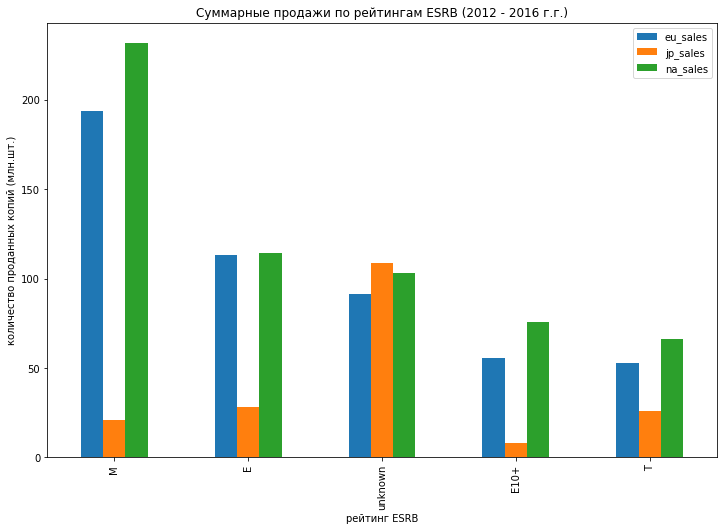

In [90]:
actual_df.pivot_table(
    index='rating', 
    values=regions, 
    aggfunc='sum')\
.sort_values(by=regions, ascending=False)\
.plot(
    kind='bar', 
    figsize=(12, 8));
plt.title('Суммарные продажи по рейтингам ESRB (2012 - 2016 г.г.)')
plt.ylabel('количество проданных копий (млн.шт.)')
plt.xlabel('рейтинг ESRB')
plt.show();

In [91]:
na_rating = actual_df.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False)

In [92]:
eu_rating = actual_df.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False)

In [93]:
jp_rating = actual_df.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False)

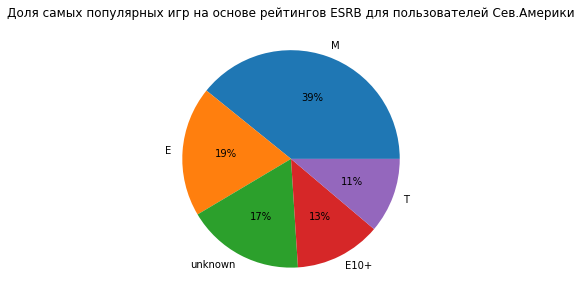

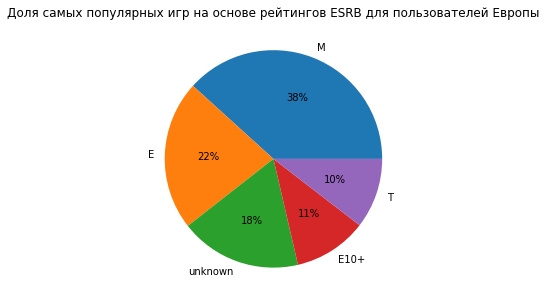

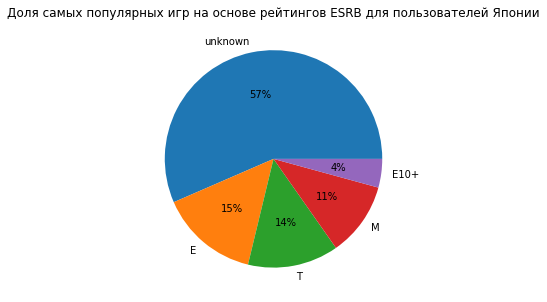

In [124]:
na_rating.plot(
    kind='pie', 
    y='na_sales', 
    autopct = '%.0f%%', 
    figsize=(5, 5)).set(ylabel='');
plt.title('Доля самых популярных игр на основе рейтингов ESRB для пользователей Сев.Америки')
plt.show()

eu_rating.plot(
    kind='pie', 
    y='eu_sales', 
    autopct = '%.0f%%', 
    figsize=(5, 5)).set(ylabel='');
plt.title('Доля самых популярных игр на основе рейтингов ESRB для пользователей Европы')
plt.show()

jp_rating.plot(
    kind='pie', 
    y='jp_sales', 
    autopct = '%.0f%%', 
    figsize=(5, 5)).set(ylabel='');
plt.title('Доля самых популярных игр на основе рейтингов ESRB для пользователей Японии')
plt.show()

**Вывод:**
1. Топ-5 по всем регионам включает игры с рейтингами 'M' («Mature 17+» — «Для взрослых»), 'E' («Everyone» — «Для всех»), 'E10+' («Everyone 10 and older» — «Для всех от 10 лет и старше») и 'T' («Teen» — «Подросткам»).
2. Структура топ-5 по рейтингам ESRB в Сев.Америке и Европе (без учета неопределенных рейтингов "unknown") совпадает - игры «Для взрослых», «Для всех», «Для всех старше 10 лет» и «Подросткам». Небольшие различия наблюдаются в размере долей в каждом из рейтингов:
- «Для взрослых» ('M') являются лидерами (в Сев.Америке - 39% и в Европе - 38%), 
- «Для всех» ('E') в Сев.Америке - 19% и в Европе - 22%,
- «Для всех старше 10 лет» ('E10+') в Сев.Америке - 13% и в Европе - 11%,
- «Подросткам» ('T') в Сев.Америке - 11% и в Европе - 10%.
- неопределенных рейтингов примерно одинаково: в североамериканском топ-5 - 17%, в европейском 18%. 
3. В целом можно сказать, что в Сев.Америке и Европе лидерами являются игры с рейтингами «Для взрослых» ('M').
4. Для рынка в Японии характерная иная ситуация:
- больше половины данных не имеют рейтинга ESRB (57%);
- наиболее популярны игры с рейтингом «Для всех» ('E') - 15%, далее следуют игры с рейтингом «Подросткам» ('T') - 14%, игры с рейтингом «Для взрослых» ('M') составляют 11%, а игры с рейтингом «Для всех старше 10 лет» ('E10+') лишь 4%.
5. В связи тем, что процедура присвоения рейтинга основывается на присланном видеоматериале от издателя, скорее всего от японских производителей не поступает такой инициативы. Возможно, они в большей степени сконцентрированы на внутреннем рынке.

##### **Выводы по  исследованию портрета пользователя каждого региона**

1. Пользователи из Сев. Америки и Европы в большинстве предпочтений очень схожи:
- пользователи предпочитают игры жанров  "Action", "Shooter", "Sports", "Role-Playing";
- в целом большинство игр в этих регионах имеют рейтинги «Для взрослых» и «Для всех» 
2. Основное различие пользователей из Сев. Америки и из Европы заключается в предпочитаемых платформах.
- в Сев.Америке наиболее популярна платформа "X360",
- в Европе лидером является "PS4",
- соперничество наблюдается между "XBox" (с платформами "X360" и "XOne") и "PlayStation" (с платформами "PS3" и "PS4")
3. Пользователи в Японии значительно отличаются от пользователей других регионов:
- пользователи предпочитают платформу "3DS", в то время как разные платформы "XBox" отсутствуют в рейтинге;
- лидером среди жанров является "Role-Playing", игры жанров "Shooter" и "Sports" отсутствуют;
- предпочитают в первую очередь игры с рейтингом «Для всех», при этом больше половины данных не имеют рейтинга ESRB.

#### Проверяем гипотезы

##### Гипотеза 1: Средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые

###### проанализируем выборок для изучаемых групп:

In [95]:
xone_df = actual_df.query('platform == "XOne" & user_score > 0')['user_score']
display(xone_df.describe())
display(f'Дисперсия выборки "Xbox One": {np.var(xone_df, ddof = 1)}')

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

'Дисперсия выборки "Xbox One": 1.9069968429360695'

In [96]:
pc_df = actual_df.query('platform == "PC" & user_score > 0')['user_score']
display(pc_df.describe())
display(f'Дисперсия выборки "PC": {np.var(pc_df, ddof = 1)}')

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

'Дисперсия выборки "PC": 2.770443997158418'

- Гипотеза является двухсторонней (нулевая гипотеза говорит о равенстве признаков, а альтернативная - о неравенстве).
- Выборки имеют достаточный размер (>30 наблюдений) для проведения анализа: "Xbox One" (182 наблюдения) и "PC" (206 наблюдений).
- Выборки не равны между собой, их стандартные отклонения "Xbox One" (std=1.380) и "PC" (std=1.664) и дисперсии "Xbox One" (ddof=1.907) и "PC" (ddof=2.77) различаются. 
- Зададим пороговое значение alpha=0,05. 
- Для подтверждения равенства средних значений двух несвязанных выборок используем "st.ttest_ind".

######  проверим *Гипотезу 1:*

H<sub>0</sub> Средние пользовательские рейтинги платформ "Xbox One" и "PC" **равны**.

H<sub>1</sub> Средние пользовательские рейтинги платформ "Xbox One" и "PC" **не равны**.

In [97]:
alpha = 0.05

results = st.ttest_ind(
    xone_df, 
    pc_df,
    equal_var=False)

display('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

'P-value:'

0.5489537965134912

Не получилось отвергнуть нулевую гипотезу.


**Вывод:**
Согласно полученному значению P-value не получилось отвергнуть нулевую гипотезу. С вероятностью 95% средние пользовательские рейтинги платформ "Xbox One" и "PC" могут быть равны. Статистики данных платформ также показывают близкие значения средних для  пользовательских рейтингов - "Xbox One" (6.5) и "PC" (6.4). 

##### Гипотеза 2:  Средние пользовательские рейтинги жанров Action и Sports разные

###### проанализируем выборок для изучаемых групп:

In [98]:
action_df = actual_df.query('genre == "Action" & user_score > 0')['user_score']
display(action_df.describe())
display(f'Дисперсия выборки "Action": {np.var(action_df, ddof = 1)}')

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

'Дисперсия выборки "Action": 1.8890840494348111'

In [99]:
sports_df = actual_df.query('genre == "Sports" & user_score > 0')['user_score']
display(sports_df.describe())
display(f'Дисперсия выборки "Sports": {np.var(sports_df, ddof = 1)}')

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

'Дисперсия выборки "Sports": 3.0385428128839274'

- Гипотеза является двухсторонней (нулевая гипотеза говорит о равенстве признаков, а альтернативная - о неравенстве).
- Выборки имеют достаточный размер (>30 наблюдений) для проведения анализа: "Action" (523 наблюдений) и "Sports" (194 наблюдений).
- Выборки не равны между собой (различаются почти в 2,7 раза в пользу "Action"), их стандартные отклонения "Action" (std=1.37444) и "Sports" (std=1.743142) и дисперсии "Action" (ddof=1.889) и "Sports" (ddof=3.0385) различаются. 
- Зададим пороговое значение alpha=0,05. 
- Для подтверждения равенства средних значений двух несвязанных выборок используем "st.ttest_ind".

######  проверим *Гипотезу 2:*

H<sub>0</sub> Средние пользовательские рейтинги платформ "Action" и "Sports" **одинаковы**.

H<sub>1</sub> Средние пользовательские рейтинги платформ "Action" и "Sports" **не одинаковы**.

In [100]:
alpha = 0.05

results = st.ttest_ind(
    action_df, 
    sports_df,
    equal_var=False)

display('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

'P-value:'

5.989458066467418e-20

Отвергаем нулевую гипотезу.


**Вывод:**
Согласно полученному значению P-value отвергаем нулевую гипотезу. С вероятностью 95% средние пользовательские рейтинги жанров Action и Sports разные. 

#####  **Вывод по результатам проверки гипотез:**
- Выборки имеют достаточный размер (>30 наблюдений) для проведения анализа.
- Выборки не равны между собой, их стандартные отклонения и дисперсии различаются. 
- Зададим пороговое значение alpha=0,05. 
- Для подтверждения равенства средних значений двух несвязанных выборок используем "st.ttest_ind", а также укажем параметр "equal_var=False".
- Обе гипотезы - двухсторонние, поэтому нулевую гипотезу формулируем с равенством признаков, а альтернативная - с неравенством. При этом, 1-ая гипотеза формулировка решаемого вопроса совпадает с нулевой гипотезой. Во 2-ой гипотезе нулевая гипотеза сформулирована как утверждение равенства, поэтому противоположна задаваемому вопросу.
- Гипотезу о том, что средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые не удалось опровергнуть. С вероятностью 95% средние пользовательские рейтинги платформ "Xbox One" и "PC" могут быть равны.
- Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные можно считать подтвержденной.

#### Общий вывод

Целью исследования являлся поиск закономерностей успешности игр, что позволит описать потенциально популярный продукт и спланировать рекламные кампании.

1. Для анализа представлен массив данных за 2016 год из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и различные игровые платформы. Для дальнейшего проведения анализа была проведена предобработка данных. В результате предобработки данных массив уменьшился на 271 строку (что составляет 1,6% от изначального массива).  

2. Исследовательский анализ данных показал:
- Что большинство игр приходится на период  с 2002 по 2010 годы, с пиком в 2008-09 годах. После 2011 года происходит спад продаж.
- Лидерами по продажам можно назвать несколько платформ - "PS2", "X360", "PS3", "Wii", "DS" и "PS", при этом наиболее успешная платформа "PS2". При этом, их жизненный цикл составляет 10-12 лет. 
- Средний жизненный цикл платформ в целом составляет 7 лет. Пик продаж приходится примерно на середину жизненного цикла. 
- Исключительная ситуация с играми на платформе PC, которые реализуются уже 32 года (на момент исследования).
- Исходя из данных о жизненном цикле, для дальнейшего исследования возьмем за актуальный период 2012 - 2016 г.г.
- Наиболее потенциальными на ближайший год можно считать "PS4" и "XOne".
- Отзывы пользователей и оценки критиков слабо коррелируют с уровнем продаж, при этом стоит отметить что оценка критиков находится в большей взаимосвязи с показателями продаж, чем пользовательские оценки.
- Наиболее популярными являются жанры "Action", "Shooter", "Role-Playing" "Sports".

4. Портрет пользователя каждого региона
- Пользователи из Сев. Америки и Европы в большинстве предпочтений очень схожи:
    - пользователи предпочитают игры жанров  "Action", "Shooter", "Sports", "Role-Playing", и в целом структура топ-5 жанров совпадают;
    - большинство игр в этих регионах имеют рейтинги «Для взрослых» и «Для всех»;
- Основное различие пользователей из Сев. Америки и из Европы заключается в предпочитаемых платформах.
    - в Сев.Америке наиболее популярна платформа "X360",
    - в Европе лидером является "PS4".
- Пользователи в Японии значительно отличаются от пользователей других регионов:
    - предпочитают игры на платформах семейства "Nintendo", лидером является "3DS";
    - среди жанров наибольшее предпочтение отдается "Role-Playing", игры жанра "Shooter" и "Sports" отсутствуют отсутствуют в рейтинге топ-5;
    - предпочитают в первую очередь игры с рейтингом «Для всех».
5. Проверка гипотез
- Исходя из качеств выборок и того, что обе гипотезы - двухсторонние, используем "st.ttest_ind" с параметром "equal_var=False" и пороговым значением alpha=0,05.
- Гипотезу о том, что средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые не удалось опровергнуть. С вероятностью 95% средние пользовательские рейтинги платформ "Xbox One" и "PC" могут быть равны.
- Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные можно считать подтвержденной.

В итоге, можно сказать, что потенциально популярный продукт - это игры с рейтингом «Для взрослых» и «Для всех", однако  в рекламной кампании следует учесть различия предпочтений пользователей из Сев. Америки, Европы и Японии (кампании могут быть условно разделены на "западные" и "восточные" рынки). При выборе конкретных игр можно ориентироваться на оценки критиков, но только как на рекомендации.
- Для Сев. Америки и Европы потенциальными можно считать "PS4" и "XOne", с жанрами "Action", "Shooter" и "Sports". 
- Для японского рынка акцентр можно сделать на платформы для "Nintendo" (в первую очередь "3DS") и игры жанра "Role-Playing".
При этом, стоит учитывать, что рынок Сев.Америки большей, чем другие регионы.